In [50]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("NVDA.csv")

In [51]:
print(df.head())
print(df.info())
summary_statistics = df.describe()
summary_statistics

         Date        Open        High         Low       Close   Adj Close  \
0  2021-01-04  131.042496  136.524994  129.625000  131.134995  130.851624   
1  2021-01-05  130.997498  134.434998  130.869995  134.047501  133.757828   
2  2021-01-06  132.225006  132.449997  125.860001  126.144997  125.872391   
3  2021-01-07  129.675003  133.777496  128.865005  133.440002  133.151642   
4  2021-01-08  133.625000  134.210007  130.419998  132.767502  132.480545   

     Volume  
0  56064000  
1  32276000  
2  58042400  
3  46148000  
4  29252800  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 697 entries, 0 to 696
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       697 non-null    object 
 1   Open       697 non-null    float64
 2   High       697 non-null    float64
 3   Low        697 non-null    float64
 4   Close      697 non-null    float64
 5   Adj Close  697 non-null    float64
 6   Volume     697 non-null 

,Open,High,Low,Close,Adj Close,Volume
count,697.000000,697.000000,697.000000,697.000000,697.000000,6.970000e+02
mean,231.067173,235.627148,226.446377,231.233590,231.043437,4.612498e+07
std,97.187587,98.602672,95.382656,96.927687,96.965846,1.775430e+07
min,109.709999,117.349998,108.129997,112.269997,112.201363,1.462760e+07
25%,156.970001,159.949997,154.009995,156.794998,156.674164,3.427640e+07
50%,203.029999,205.327499,199.330002,203.339996,203.112366,4.521970e+07
75%,272.540009,277.579987,267.220001,272.859985,272.554565,5.642760e+07
max,502.160004,502.660004,489.579987,493.549988,493.509338,1.543911e+08


Basic Feature Engineering

- to find: GDP, USD OIS

In [54]:
df['Close_Diff'] = df['Close'].diff()
df['Volume_Diff'] = df['Volume'].diff()
df['Spread'] = df['High'] - df['Low']
df['Candle'] = df['Close'] - df['Open']
def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).fillna(0)
    loss = (-delta.where(delta < 0, 0)).fillna(0)
    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi
df['RSI'] = calculate_rsi(df)

#df.tail()


Plotting Movements over Time

- to do: see if there are any notable financial news happenings that coincide with big movements
- is the vol
- RSI

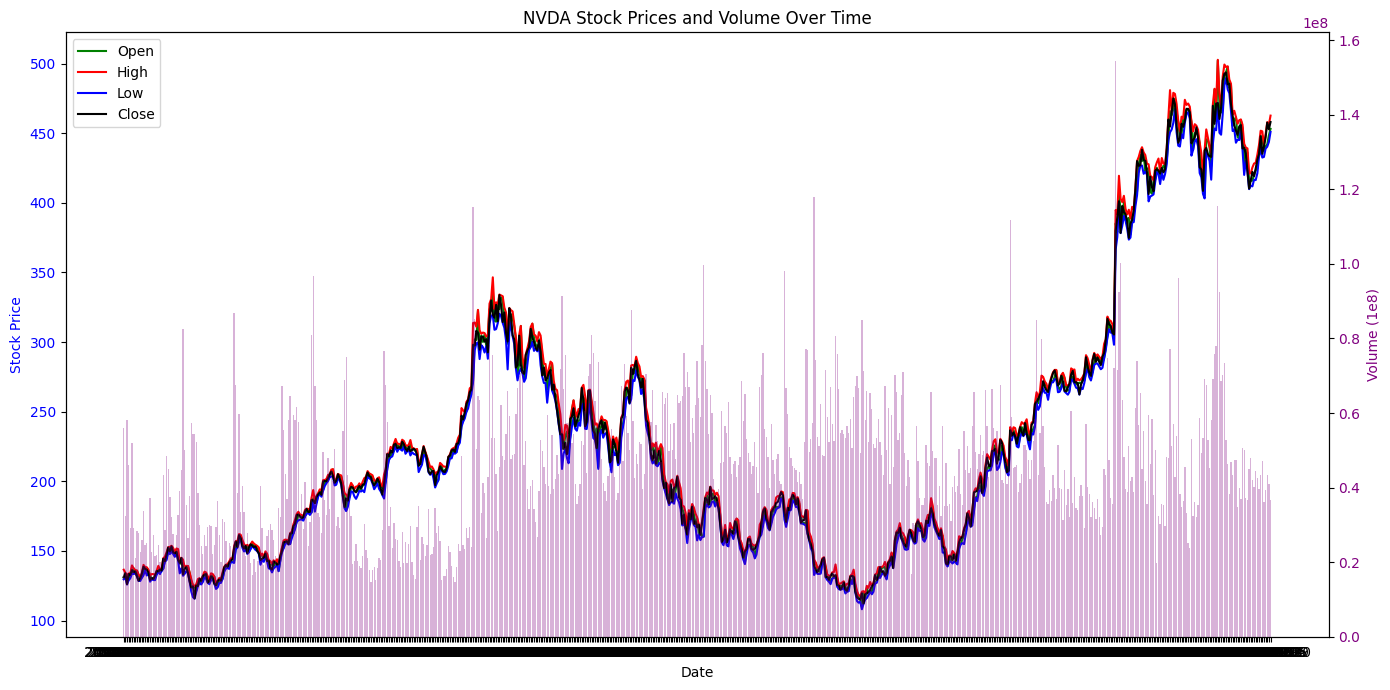

In [56]:
fig, ax1 = plt.subplots(figsize=(14, 7))
ax1.set_xlabel('Date')
ax1.set_ylabel('Stock Price', color='blue')
ax1.plot(df['Date'], df['Open'], label='Open', color='green')
ax1.plot(df['Date'], df['High'], label='High', color='red')
ax1.plot(df['Date'], df['Low'], label='Low', color='blue')
ax1.plot(df['Date'], df['Close'], label='Close', color='black')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.legend()
ax2 = ax1.twinx()
ax2.set_ylabel('Volume (1e8)', color='purple')
ax2.bar(df['Date'], df['Volume'], color='purple', alpha=0.3)
ax2.tick_params(axis='y', labelcolor='purple')
plt.xticks(rotation=45)
plt.title('NVDA Stock Prices and Volume Over Time')
plt.tight_layout()
plt.show()

Plotting Diff

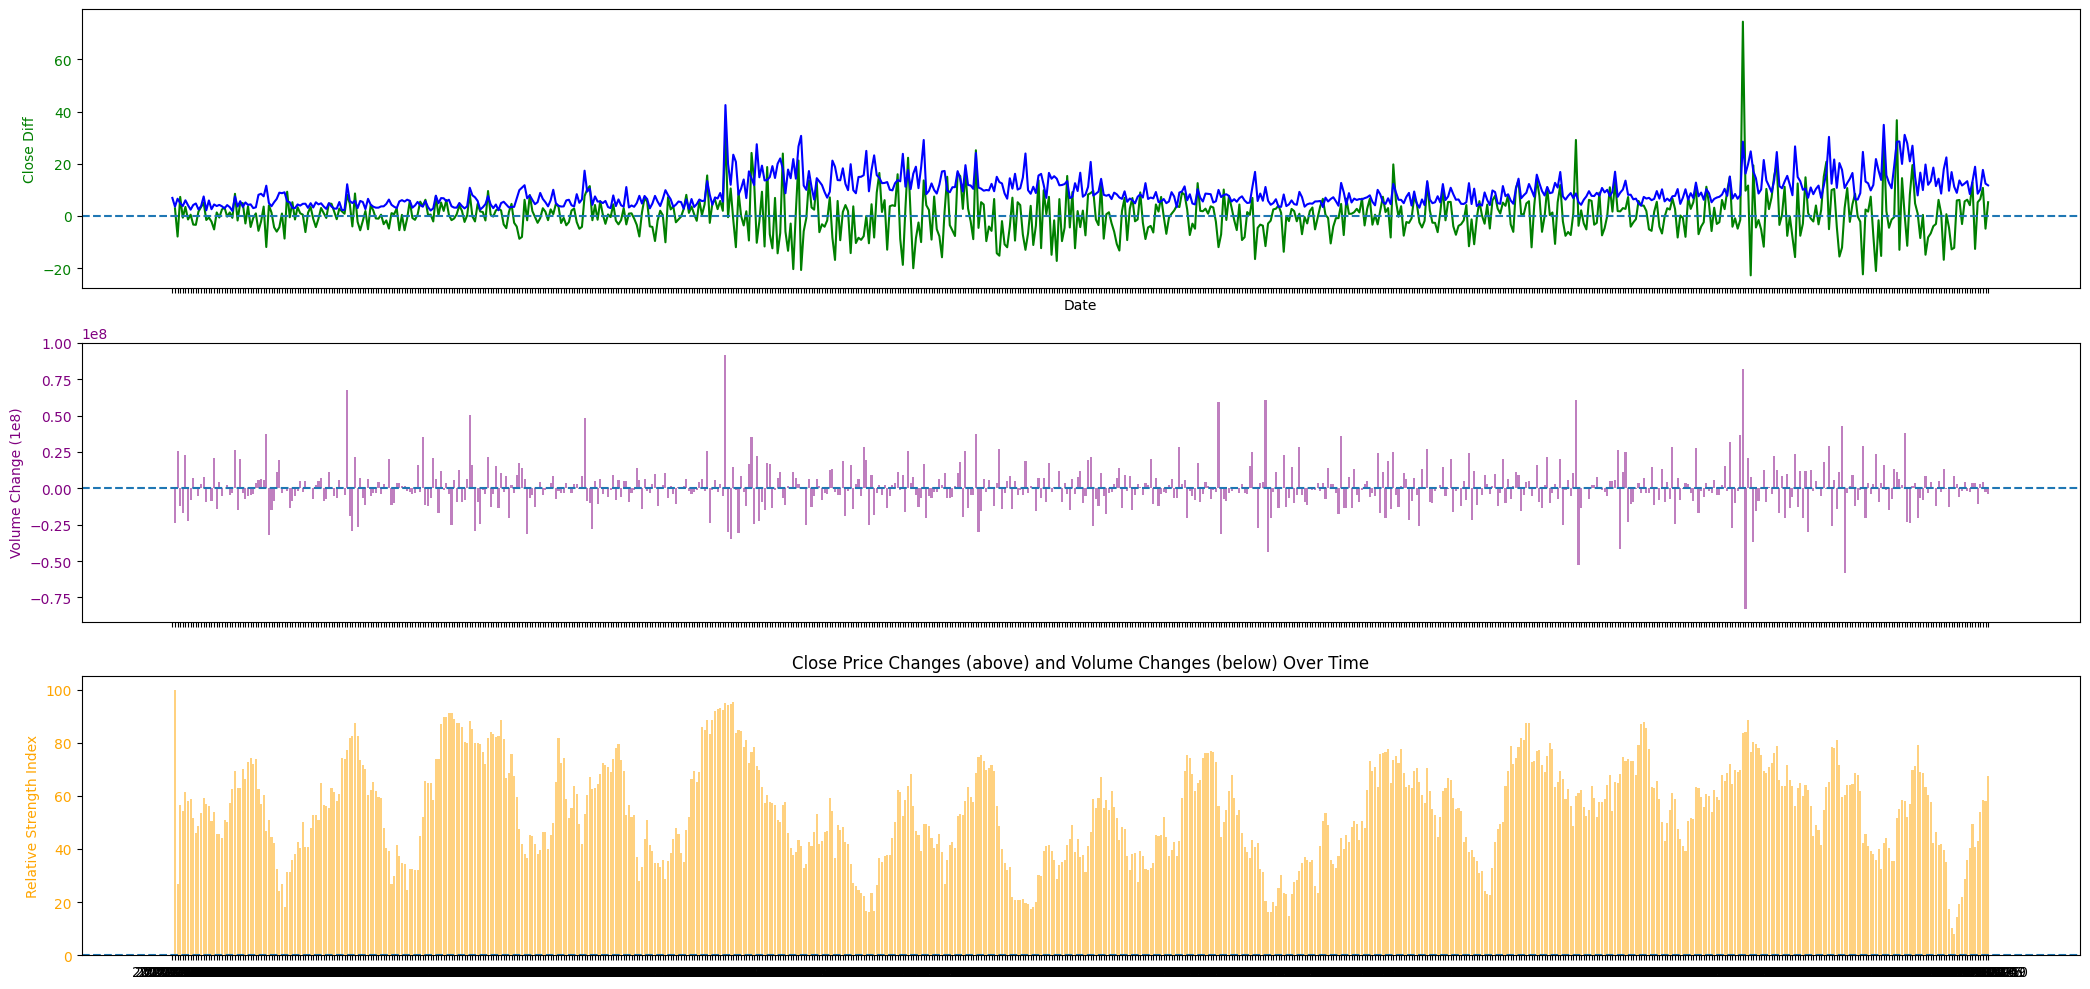

In [55]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(21, 10), sharex=True)
plt.title('Close Price Changes (above) and Volume Changes (below) Over Time')

ax1.set_xlabel('Date')
ax1.set_ylabel('Close Diff', color='green')
ax1.plot(df['Date'], df['Close_Diff'], label='Open', color='green')
ax1.plot(df['Date'], df['Spread'], label='Open', color='blue')
ax1.tick_params(axis='y', labelcolor='green')
ax1.axhline(0, linestyle = 'dashed')

ax2.set_ylabel('Volume Change (1e8)', color='purple')
ax2.bar(df['Date'], df['Volume_Diff'], color='purple', alpha=0.5)
ax2.tick_params(axis='y', labelcolor='purple')
ax2.axhline(0, linestyle = 'dashed')

ax3.set_ylabel('Relative Strength Index', color='orange')
ax3.bar(df['Date'], df['RSI'], color='orange', alpha=0.5)
ax3.tick_params(axis='y', labelcolor='orange')
ax3.axhline(0, linestyle = 'dashed')

plt.tight_layout()
plt.show()